# TP1

## Consigna

![alt text for screen readers](consigna.png "")

## Solucion

### Punto 1

In [1]:
import numpy as np
from scipy.fft import fft2, ifft2
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def create_gauss_filter(h, w, k_size, sigma):
    filter_spacial = np.zeros((h, w))
    
    center_x = h // 2
    center_y = w // 2
    
    norm_factor = 1 / (2 * np.pi * sigma**2)
    
    k_range = range(-k_size // 2, k_size // 2 + 1)
    
    for i in k_range:
        for j in k_range:
            filter_spacial[center_x + i, center_y + j] = norm_factor * np.exp(-(i**2 + j**2) / (2 * sigma**2))
    
    filter_spacial = filter_spacial/np.sum(filter_spacial)
    
    filter_frequency = fft2(filter_spacial)
    
    return filter_spacial, filter_frequency

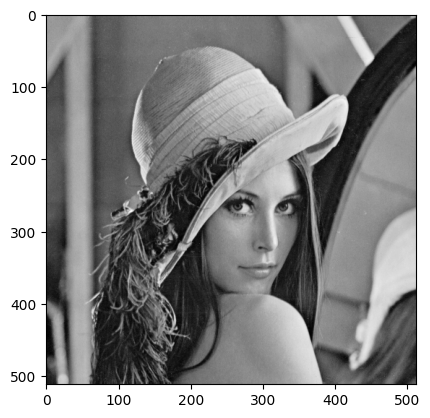

In [3]:
image = cv.cvtColor(cv.imread('Lenna.png'), cv.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

In [4]:
def apply_fft_filter(image, fft_filter):
    img_fft = np.fft.fft2(image)
    filtered = img_fft * fft_filter
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))
    return img_gauss

def apply_spatial_filter(image, spatial_filter):
    filtered_spatial = cv.filter2D(image, -1, spatial_filter)
    return filtered_spatial


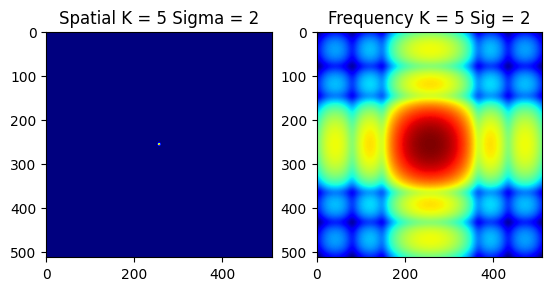

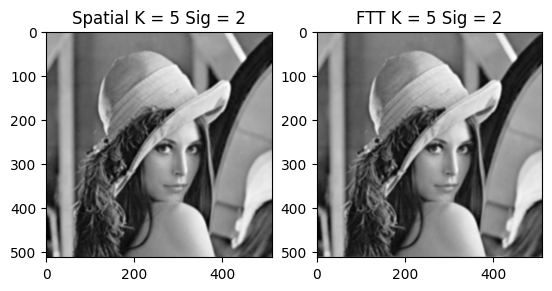

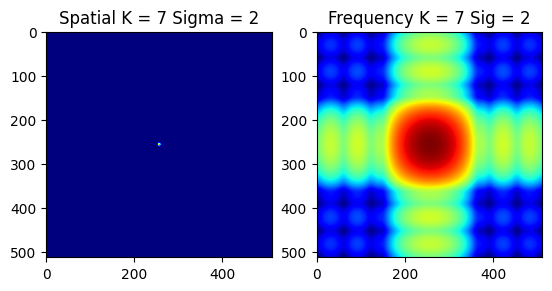

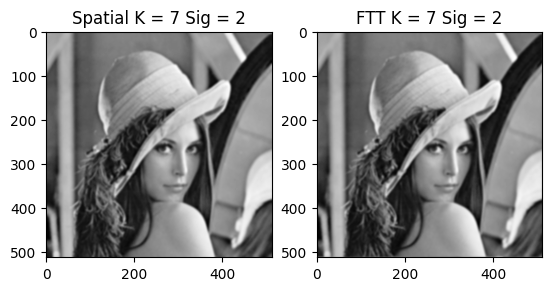

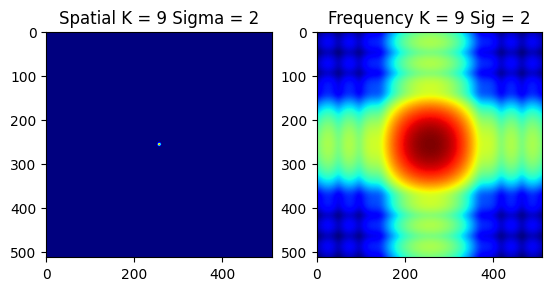

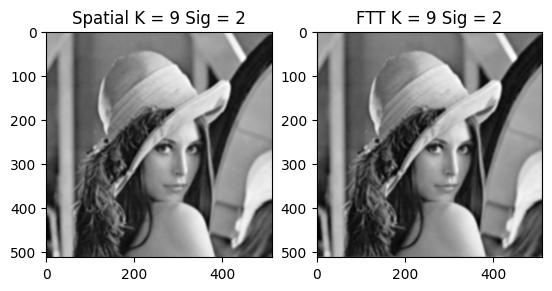

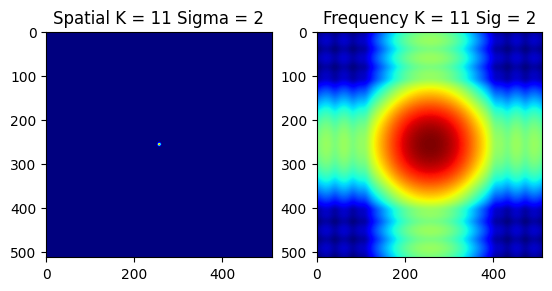

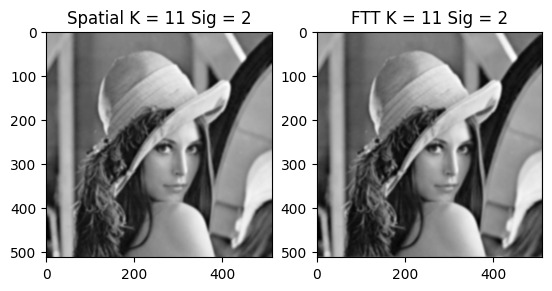

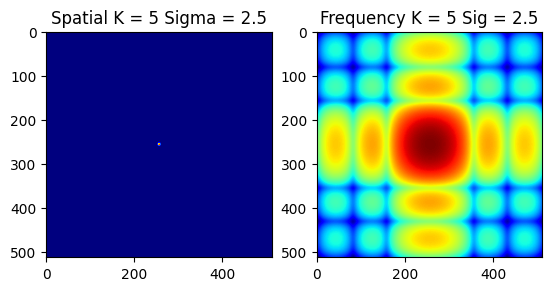

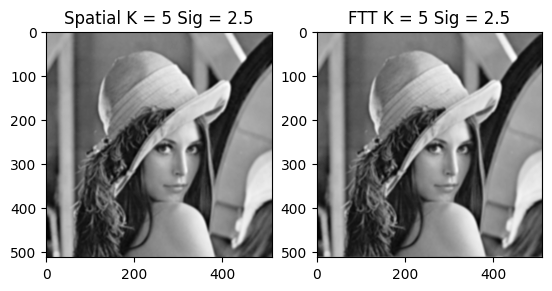

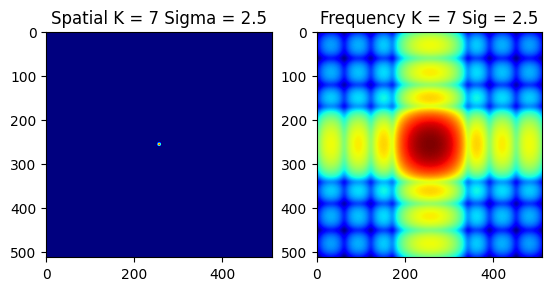

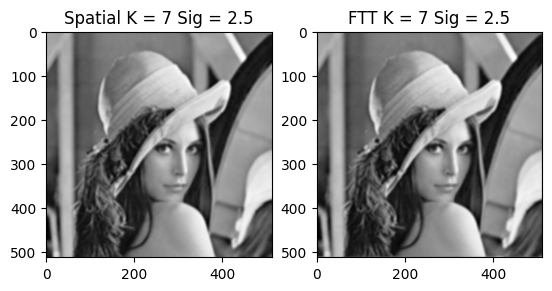

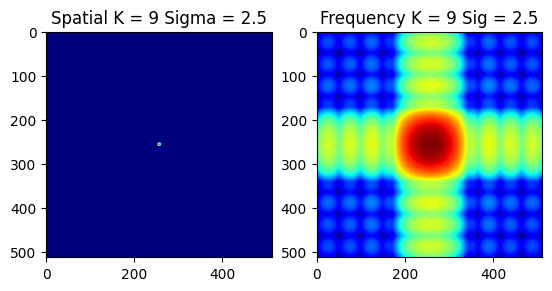

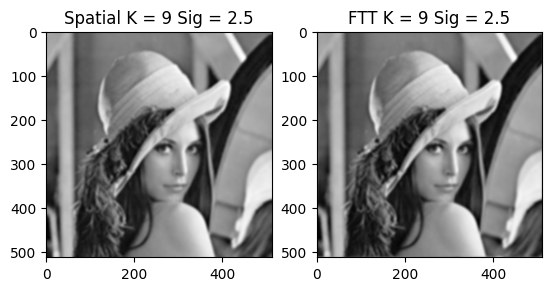

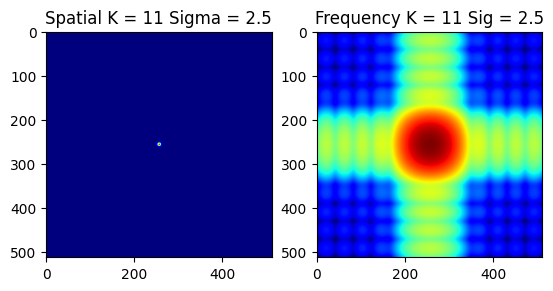

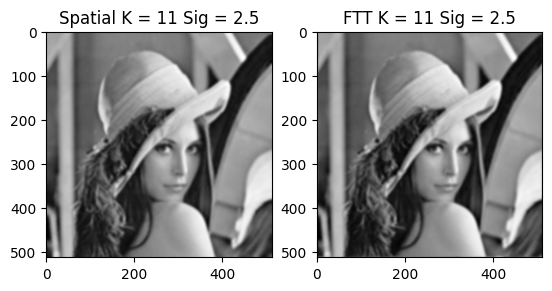

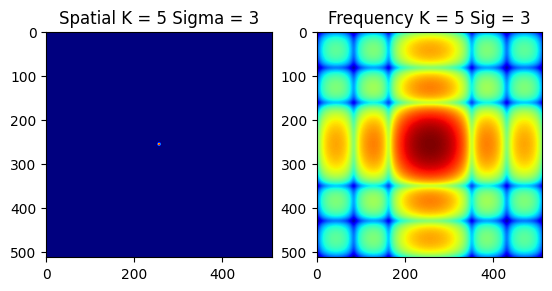

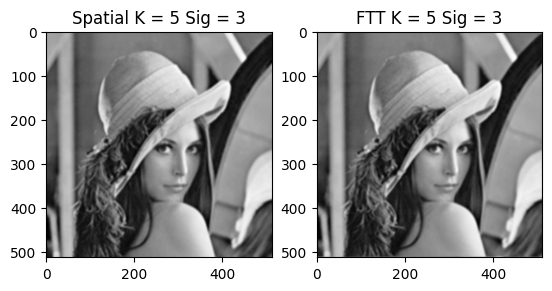

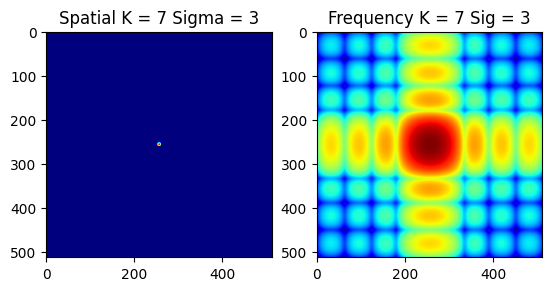

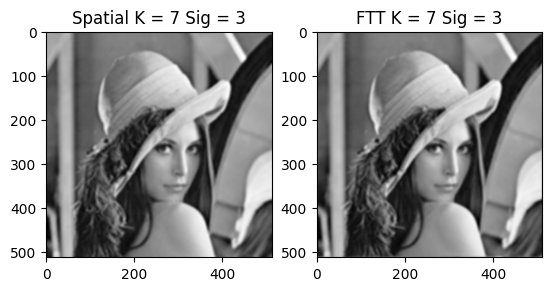

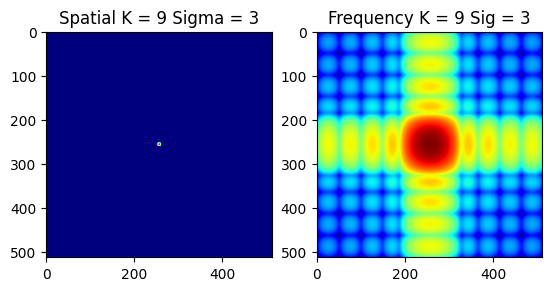

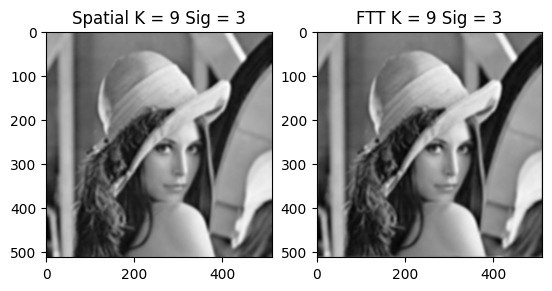

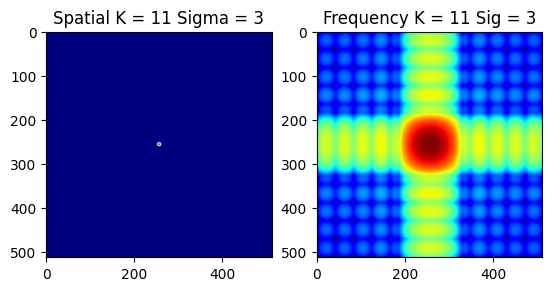

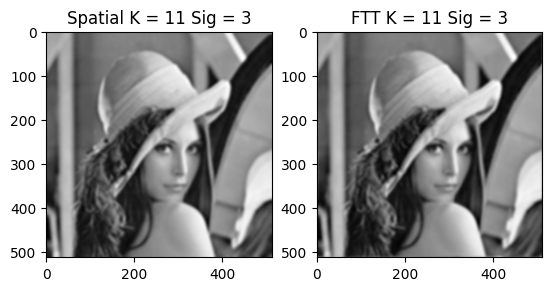

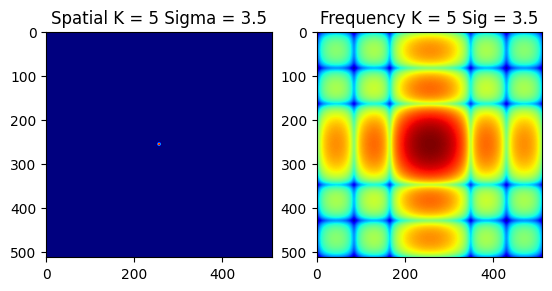

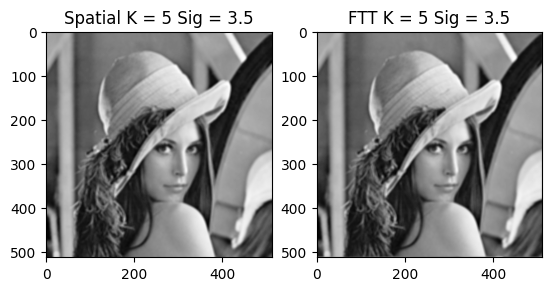

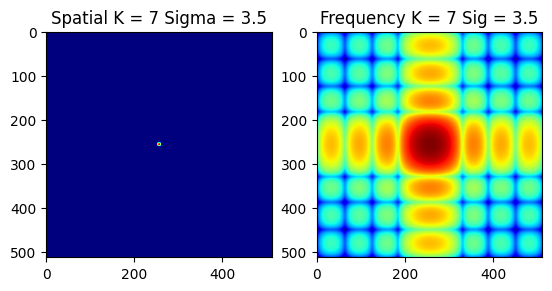

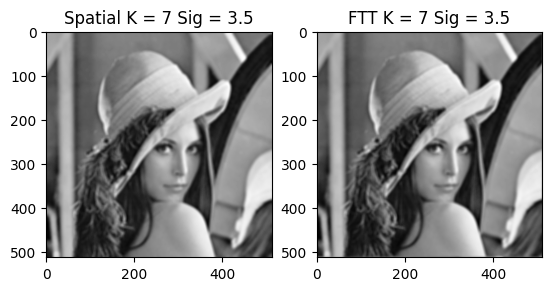

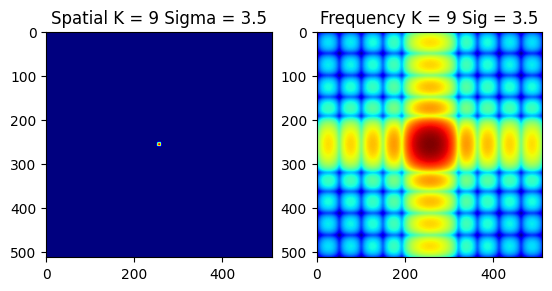

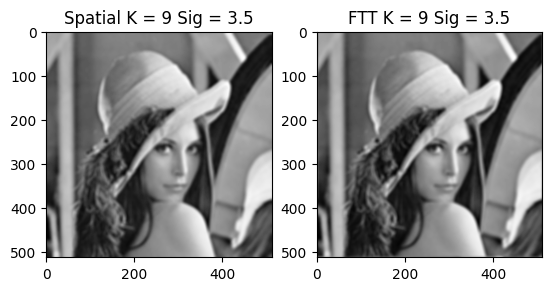

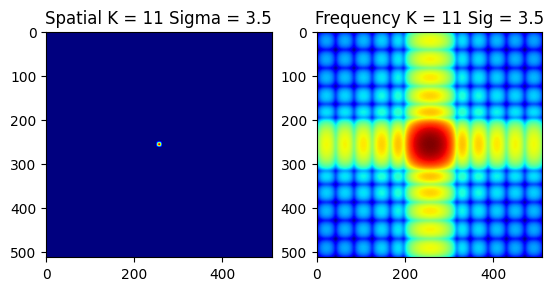

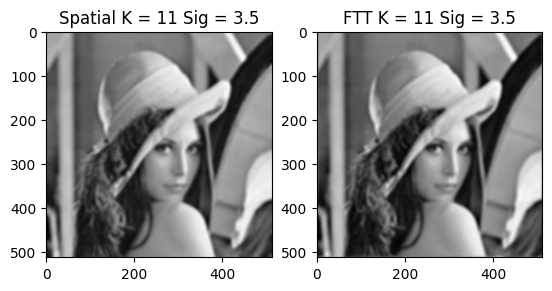

In [5]:
for sigma in [2, 2.5, 3, 3.5]:
        for k in [5, 7, 9, 11]:
                filter, fft = create_gauss_filter(image.shape[0], image.shape[1], k, sigma)

                plt.subplot(1, 2, 1)
                plt.imshow(filter, cmap='jet')
                plt.title(f'Spatial K = {k} Sigma = {sigma}')

                plt.subplot(1, 2, 2)
                plt.imshow(20 *np.log10(np.abs(np.fft.fftshift(fft))), cmap='jet')
                plt.title(f'Frequency K = {k} Sig = {sigma}')

                plt.show()

                plt.subplot(1, 2, 1)

                filtered_spatial = apply_spatial_filter(image, filter)
                
                plt.imshow(filtered_spatial, cmap='gray')
                plt.title(f"Spatial K = {k} Sig = {sigma}")
                
                plt.subplot(1, 2, 2)

                img_gauss = apply_fft_filter(image, fft)

                plt.imshow(img_gauss, cmap='gray')
                plt.title(f"FTT K = {k} Sig = {sigma}")

                plt.show()

### Punto 2

In [6]:
def calc_image_quality_meassure(image):
    m, n = image.shape
    f = np.fft.fft2(image)
    fc = np.fft.fftshift(f)
    af = np.abs(fc)
    m = np.max(af)
    th = np.sum(f > m/1000)
    return th/(m*n)

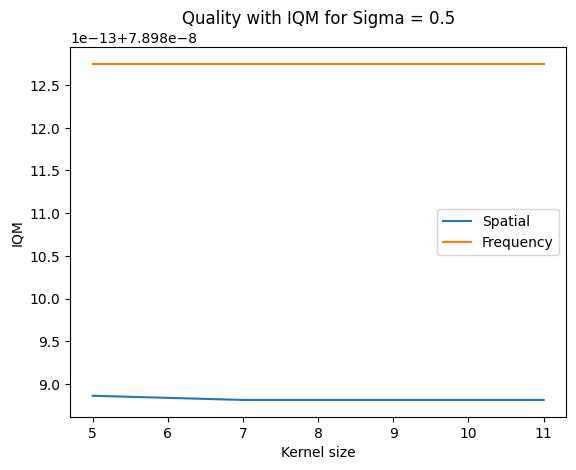

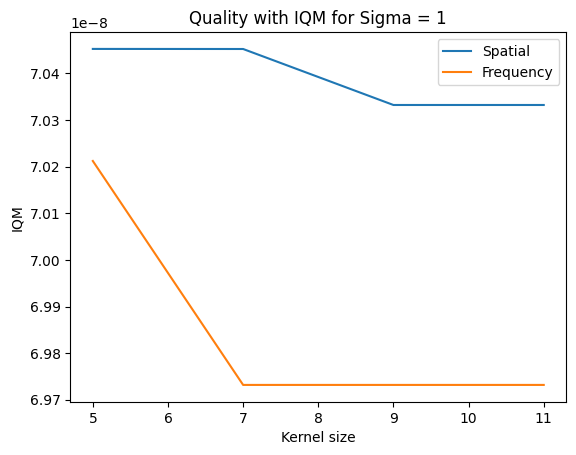

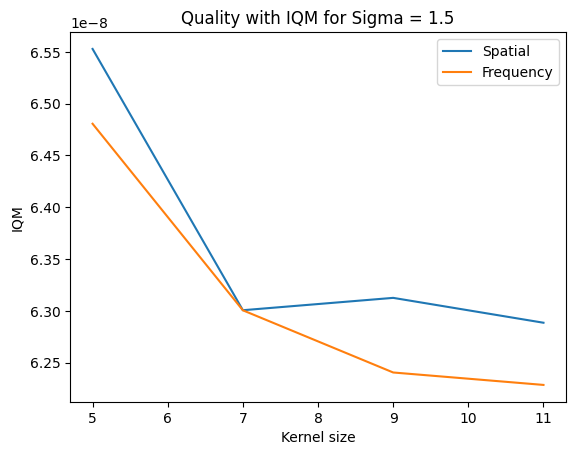

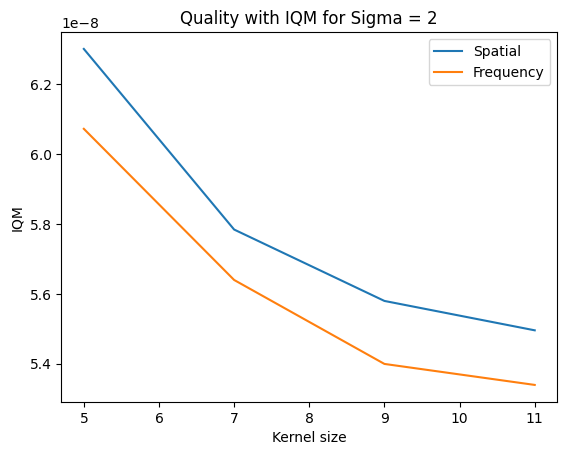

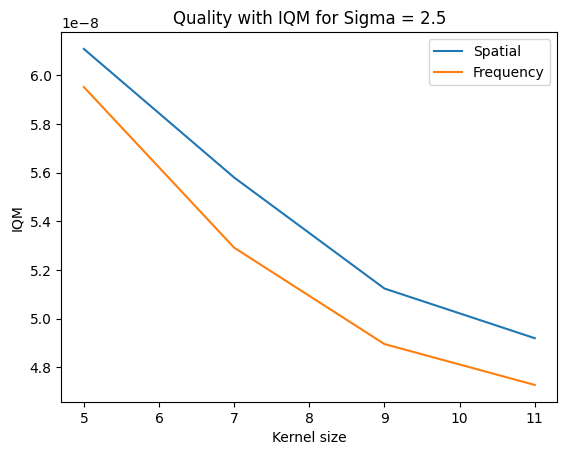

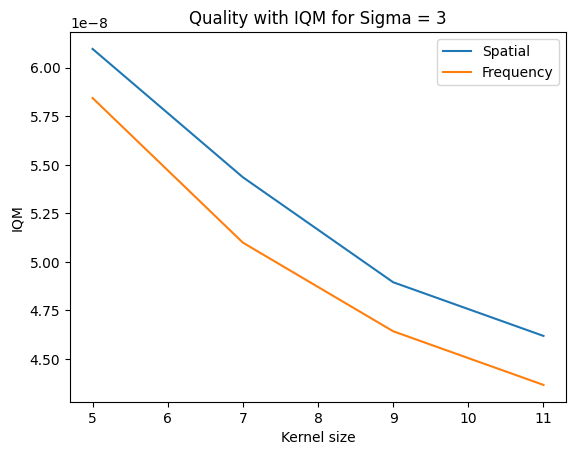

In [7]:
for sigma in [0.5, 1, 1.5, 2, 2.5, 3]:
        spatial = []
        freq = []
        ks = [5, 7, 9, 11]
        for k in ks:
                filter, fft = create_gauss_filter(image.shape[0], image.shape[1], k_size = k, sigma = sigma)

                filtered_spatial = apply_spatial_filter(image, filter)
                filtered_fft = apply_fft_filter(image, fft)

                quality_spatial = calc_image_quality_meassure(filtered_spatial)
                quality_fft = calc_image_quality_meassure(filtered_fft)

                spatial.append(quality_spatial)
                freq.append(quality_fft)

                # print(f"K = {k} Sigma = {sigma} \nQuality Spatial = {quality_spatial} Quality Frequency = {quality_fft} \nDiff = {np.abs(quality_spatial - quality_fft)} \n")
                        
                # plt.subplot(1, 2, 1)
                # plt.imshow(20 * np.log10(np.abs(np.fft.fftshift(np.fft.fft2(filtered_spatial)))), cmap='jet')
                
                # plt.subplot(1, 2, 2)
                # plt.imshow(20 * np.log10(np.abs(np.fft.fftshift(np.fft.fft2(filtered_fft)))), cmap='jet')
                # plt.show()
        plt.figure()
        ax = plt.axes()

        ax.plot(ks, spatial, label='Spatial')
        ax.plot(ks, freq, label='Frequency')

        ax.legend()

        ax.set_xlabel('Kernel size')
        ax.set_ylabel('IQM')
        ax.set_title(f'Quality with IQM for Sigma = {sigma}')

        plt.show()

### Punto 3

In [8]:
def calculate_rmse(image1, image2):    
    squared_diff = np.square(image1.astype(float) - image2.astype(float))
    mean_squared_diff = np.mean(squared_diff)
    rmse = np.sqrt(mean_squared_diff)
    return 1/rmse

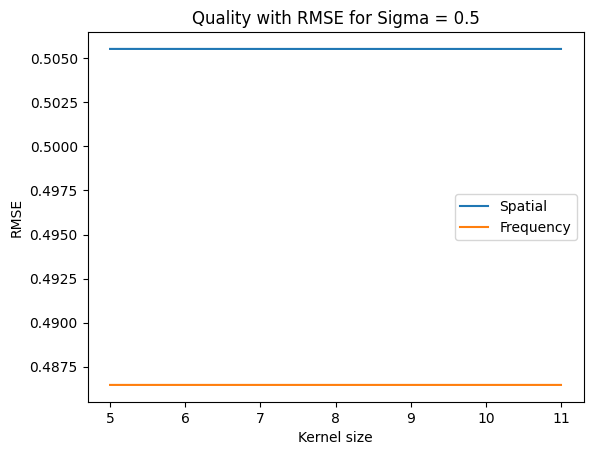

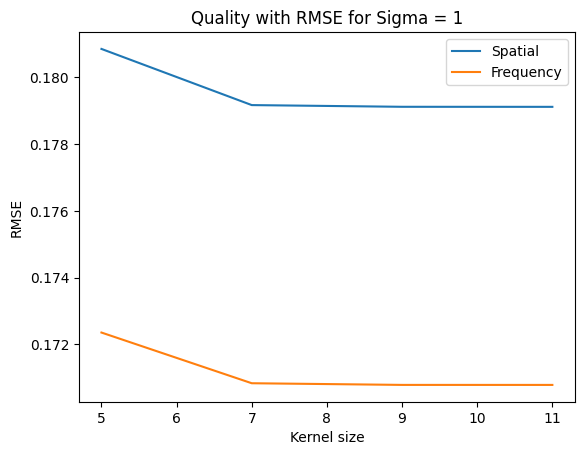

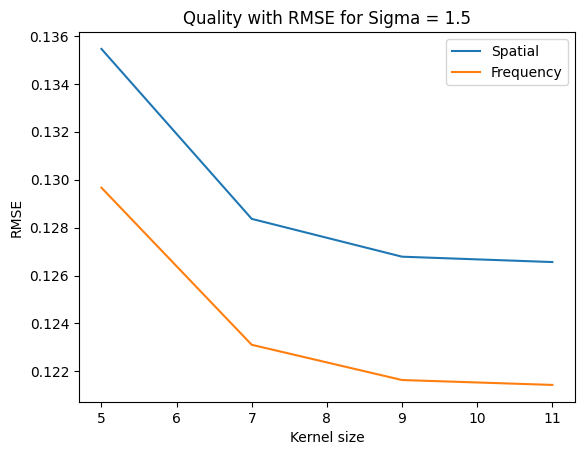

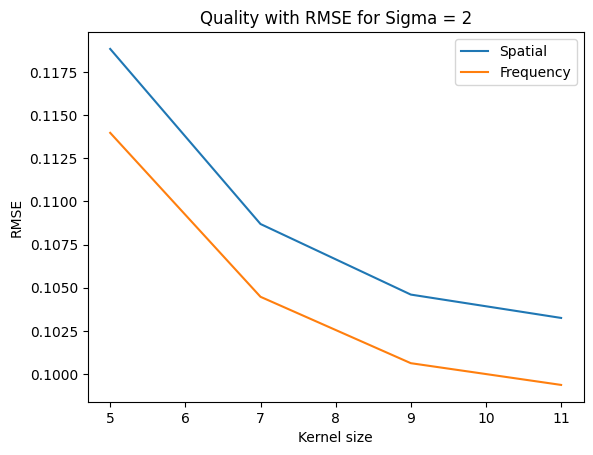

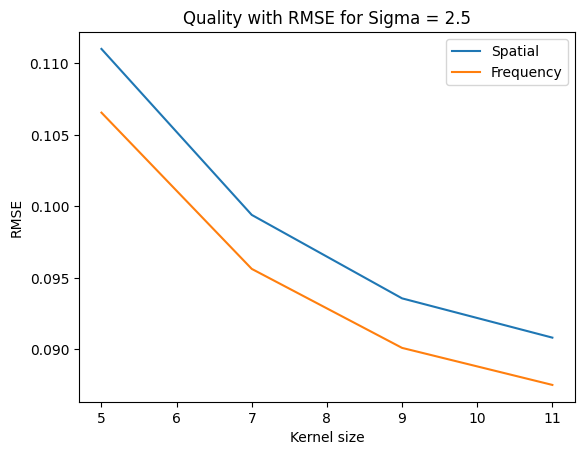

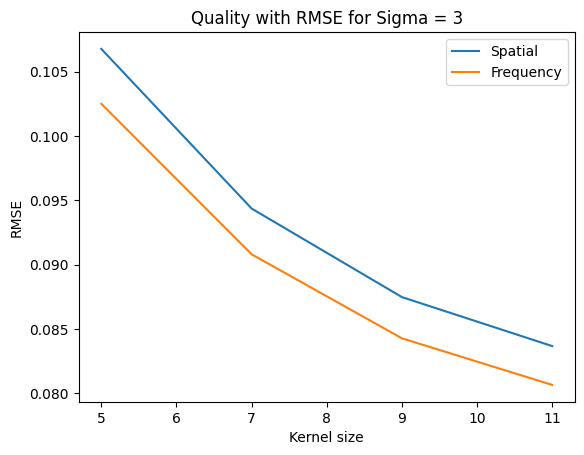

In [9]:
for sigma in [0.5, 1, 1.5, 2, 2.5, 3]:
        spatial = []
        freq = []
        ks = [5, 7, 9, 11]
        for k in ks:

                filter, fft = create_gauss_filter(image.shape[0], image.shape[1], k_size = k, sigma = sigma)

                filtered_spatial = apply_spatial_filter(image, filter)
                filtered_fft = apply_fft_filter(image, fft)

                # plt.imshow(filtered_spatial, cmap='gray')
                # plt.show()
                # plt.imshow(filtered_fft, cmap='gray')
                # plt.show()


                quality_spatial = calculate_rmse(image, filtered_spatial)
                quality_fft = calculate_rmse(image, filtered_fft)

                spatial.append(quality_spatial)
                freq.append(quality_fft)

                # print(f"Sigma = {sigma} K = {k} \nQuality Spatial = {quality_spatial} Quality Frequency = {quality_fft} \nDiff = {np.abs(quality_spatial - quality_fft)}\n")

                # plt.imshow(20 *np.log10(np.abs(np.fft.fftshift(np.fft.fft2(filtered_spatial)))), cmap='jet')
                # plt.show()

                # plt.imshow(20 *np.log10(np.abs(np.fft.fftshift(np.fft.fft2(filtered_fft)))), cmap='jet')
                # plt.show()
        plt.figure()
        ax = plt.axes()

        ax.plot(ks, spatial, label='Spatial')
        ax.plot(ks, freq, label='Frequency')

        ax.legend()

        ax.set_xlabel('Kernel size')
        ax.set_ylabel('RMSE')
        ax.set_title(f'Quality with RMSE for Sigma = {sigma}')

        plt.show()